In [1]:
#importing Libraries

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


# Reading the Data

In [2]:
df=pd.read_csv("advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Data Visualization

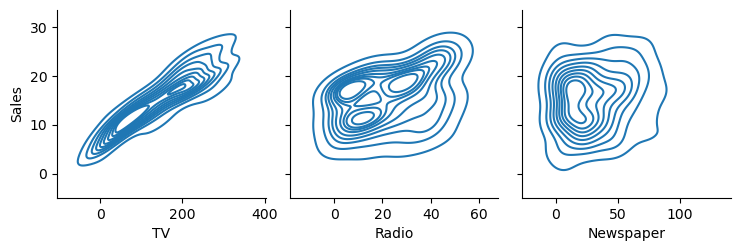

In [8]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind="kde")

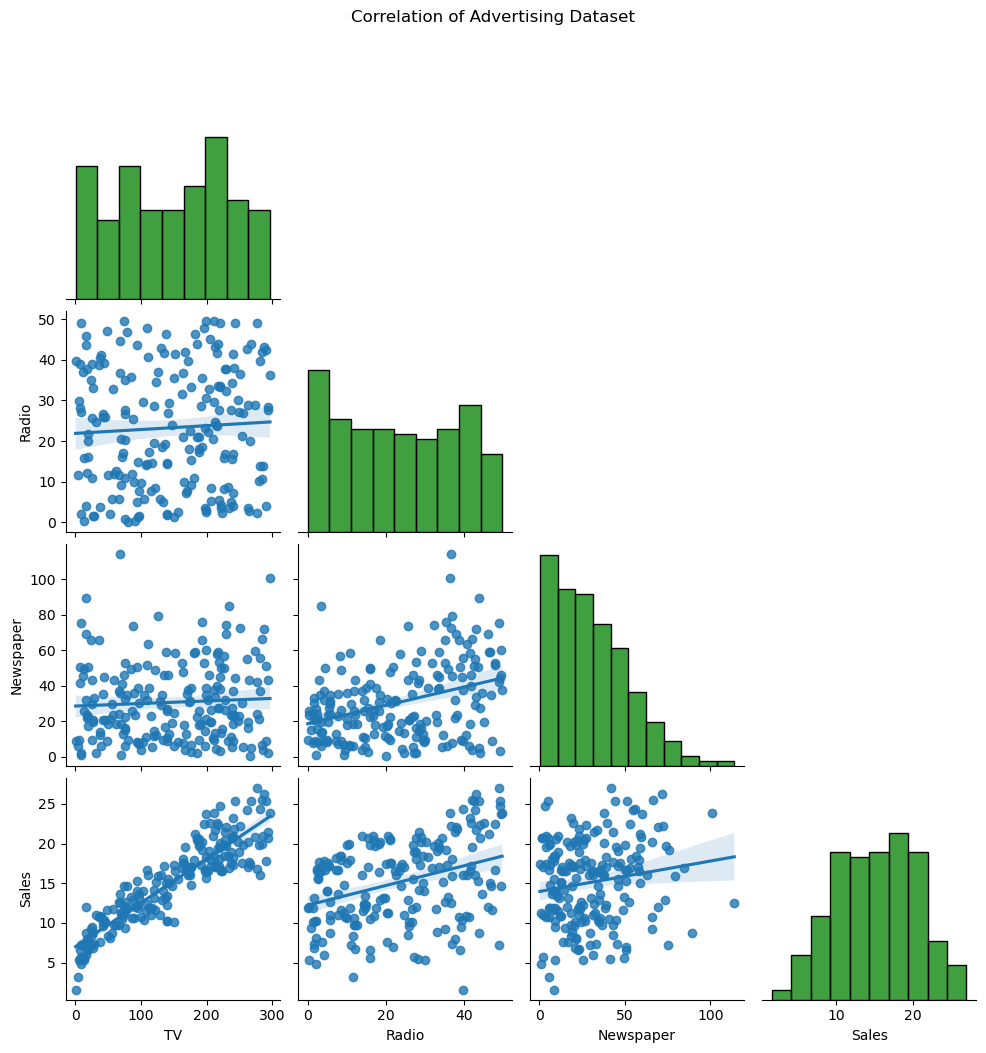

In [9]:
g = sns.pairplot(df, kind='reg', diag_kws = {'color' : 'green'},corner=True)
g.fig.suptitle("Correlation of Advertising Dataset", y= 1.05)
plt.show()

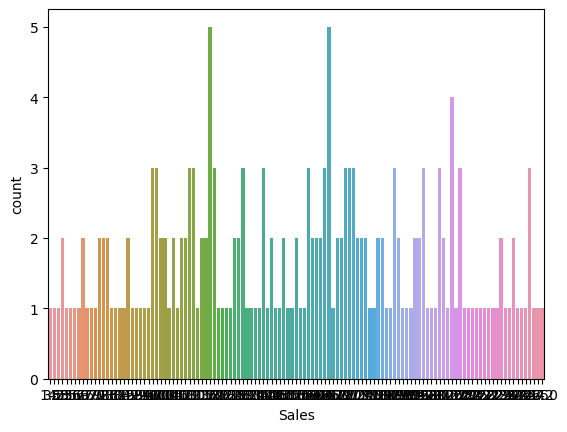

In [10]:
sns.countplot(df['Sales'])
plt.show()

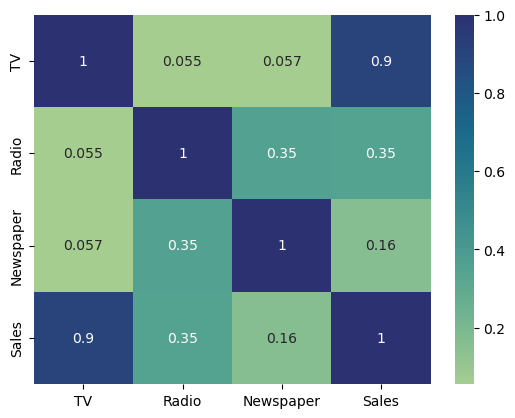

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

# we can see that it sales are highly correlated with the TV

In [12]:
X=df.iloc[:,:3]
y=df["Sales"]

# Training the Data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [14]:
#Applying various algorithms

model_lr=LinearRegression()
model_SVR=SVR()
model_RFR=RandomForestRegressor(random_state=42,n_estimators=100)
model_XGR=XGBRegressor()

In [15]:
#fitting the data
m1=model_lr.fit(X_train,y_train)
m2=model_SVR.fit(X_train,y_train)
m3=model_RFR.fit(X_train,y_train)
m4=model_XGR.fit(X_train,y_train)

In [16]:
#predicting the data
pred1=model_lr.predict(X_test)
pred2=model_SVR.predict(X_test)
pred3=model_RFR.predict(X_test)
pred4=model_XGR.predict(X_test)

In [17]:
#Checking accuracy
print("LinearRegression : ",mean_absolute_error(pred1,y_test), model_lr.score(X_test,y_test))
print("SVR : ",mean_absolute_error(pred2,y_test),model_SVR.score(X_test,y_test))
print("RandomForestRegressor : ",mean_absolute_error(pred3,y_test),model_RFR.score(X_test,y_test))
print("XGBRegressor : ",mean_absolute_error(pred4,y_test),model_XGR.score(X_test,y_test))

LinearRegression :  1.3989548652975246 0.9032402609859365
SVR :  1.7904387397680663 0.847897341030832
RandomForestRegressor :  0.8577999999999956 0.9625954064270728
XGBRegressor :  0.9374609168370566 0.955844566649916


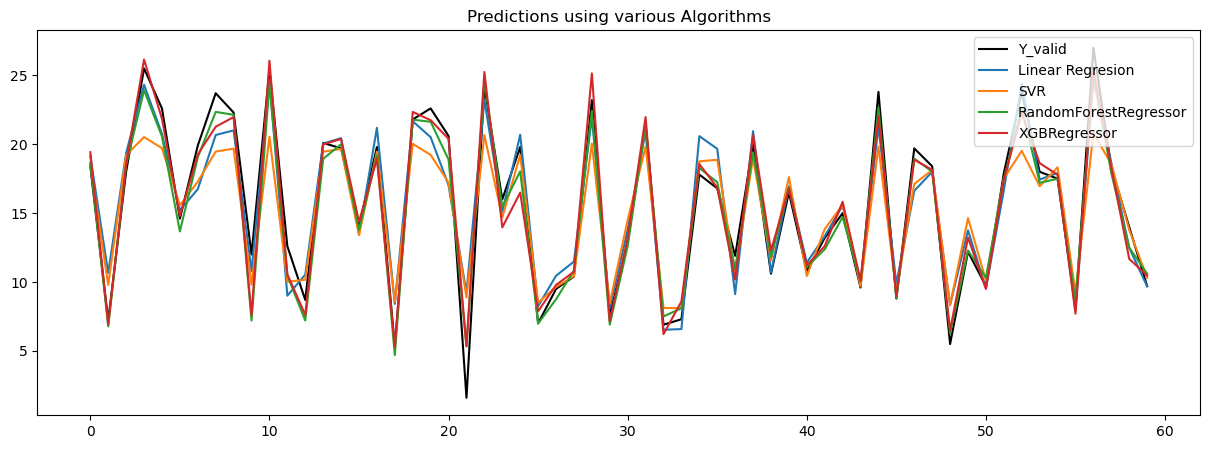

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_test)),y_test, label="Y_valid",color="black")
plt.plot(range(0,len(y_test)),pred1, label="Linear Regresion")
plt.plot(range(0,len(y_test)),pred2, label="SVR")
plt.plot(range(0,len(y_test)),pred3, label="RandomForestRegressor")
plt.plot(range(0,len(y_test)),pred4, label="XGBRegressor")

plt.legend(loc="upper right")
plt.title("Predictions using various Algorithms")

plt.show()